<a href="https://colab.research.google.com/github/Shalu-Yadav0811/CO2-Emission-Prediction/blob/main/CO2EmissionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!git clone https://github.com/dewirizki/Co2Emission_Prediction.git

fatal: destination path 'Co2Emission_Prediction' already exists and is not an empty directory.


In [34]:
!pip install streamlit

In [66]:
!pip install pyngrok

In [35]:
import streamlit as st
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [36]:
# File path and sheet name
file_path = "/content/Co2Emission_Prediction/Data/climate_change_download_0.xls"
sheet_name = "Data"

In [37]:
# Load Excel data into a pandas DataFrame
data_original = pd.read_excel(io=file_path, sheet_name=sheet_name)

In [38]:
# Display dataset info and first few rows
print(data_original.info())
print(data_original.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country code  13512 non-null  object
 1   Country name  13512 non-null  object
 2   Series code   13512 non-null  object
 3   Series name   13512 non-null  object
 4   SCALE         13512 non-null  object
 5   Decimals      13512 non-null  object
 6   1990          10017 non-null  object
 7   1991          10017 non-null  object
 8   1992          10017 non-null  object
 9   1993          10017 non-null  object
 10  1994          10017 non-null  object
 11  1995          10017 non-null  object
 12  1996          10017 non-null  object
 13  1997          10017 non-null  object
 14  1998          10017 non-null  object
 15  1999          10017 non-null  object
 16  2000          10017 non-null  object
 17  2001          10017 non-null  object
 18  2002          10017 non-null  object
 19  2003

In [80]:
data_original.describe()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,13512,13512,13512,13512,13512,13512,10017,10017,10017,10017,...,10017,10017,10017,10017,10017,10017,10017,10017,10017,12382
unique,233,233,58,58,2,3,4355,3398,3523,3583,...,3877,3869,4007,4484,4008,4047,4080,3506,2164,1434
top,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,58,58,233,233,10017,5823,5163,6520,6364,6300,...,5960,5974,5792,4933,5781,5769,5414,6256,7685,10244


In [81]:
data_original['Series code'].unique()

array(['AG.LND.EL5M.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.YLD.CREL.KG',
       'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS', 'EG.USE.COMM.GD.PP.KD',
       'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC',
       'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE',
       'EN.ATM.NOXE.KT.CE', 'EN.CLC.AERT', 'EN.CLC.DRSK.XQ',
       'EN.CLC.GHGR.MT.CE', 'EN.CLC.HCDM', 'EN.CLC.HJIP',
       'EN.CLC.HPPT.MM', 'EN.CLC.ICER', 'EN.CLC.IERU', 'EN.CLC.MDAT.ZS',
       'EN.CLC.MMDT.C', 'EN.CLC.NAMA', 'EN.CLC.NAPA', 'EN.CLC.NCOM',
       'EN.CLC.PCAT.C', 'EN.CLC.PCCC', 'EN.CLC.PCHW', 'EN.CLC.PCPT.MM',
       'EN.CLC.RNET', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS',
       'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ',
       'IE.PPI.ENGY.CD', 'IE.PPI.TELE.CD', 'IE.PPI.TRAN.CD',
       'IE.PPI.WATR.CD', 'IQ.CPA.PUBS.XQ', 'IS.ROD.PAVE.ZS',
       'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS',
       'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS',
       'SH.MED.NUMW.P3', 'S

In [82]:
data_original["Series name"].unique()

array(['Land area below 5m (% of land area)',
       'Agricultural land under irrigation (% of total ag. land)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of total population)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Annex-I emissions reduction target',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Hosted Clean Development Mechanism (CDM) projects',
       'Hosted Joint Implementation (JI) projects',
       'Av

In [83]:
data_original["SCALE"].unique()

array([0, 'Text'], dtype=object)

In [84]:
data_original["Decimals"].unique()

array([1, 0, 'Text'], dtype=object)

In [85]:
data_original[data_original["SCALE"]=="Text"]

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


In [86]:
data_original[data_original["Decimals"]=="Text"]

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


In [39]:
# Reshaping: Convert year columns (1990-2011) into a single column "Year"
data_long = data_original.melt(
    id_vars=["Country code", "Country name", "Series code", "Series name", "SCALE", "Decimals"],
    var_name="Year",
    value_name="CO2_Emissions"
)

In [40]:
# Convert Year to numeric
data_long["Year"] = pd.to_numeric(data_long["Year"], errors="coerce")

In [41]:
# Convert CO2 emissions column to numeric (handling missing values)
data_long["CO2_Emissions"] = pd.to_numeric(data_long["CO2_Emissions"], errors="coerce")

In [42]:
# Filtering data for a specific year (e.g., 2020) - but dataset only goes up to 2011
year_filter = 2010
data_filtered = data_long[data_long["Year"] == year_filter]

In [43]:
# Handling missing values (drop NaNs)
data_cleaned = data_long.dropna()

In [44]:
# Saving the cleaned dataset
data_cleaned.to_csv("co2_emission_cleaned.csv", index=False)

In [45]:
print("Data cleaning completed and saved as 'co2_emission_cleaned.csv'")
print(data_cleaned.head())

Data cleaning completed and saved as 'co2_emission_cleaned.csv'
  Country code Country name     Series code  \
0          ABW        Aruba  AG.LND.EL5M.ZS   
1          ADO      Andorra  AG.LND.EL5M.ZS   
2          AFG  Afghanistan  AG.LND.EL5M.ZS   
3          AGO       Angola  AG.LND.EL5M.ZS   
4          ALB      Albania  AG.LND.EL5M.ZS   

                           Series name SCALE Decimals  Year  CO2_Emissions  
0  Land area below 5m (% of land area)     0        1  1990      29.574810  
1  Land area below 5m (% of land area)     0        1  1990       0.000000  
2  Land area below 5m (% of land area)     0        1  1990       0.000000  
3  Land area below 5m (% of land area)     0        1  1990       0.208235  
4  Land area below 5m (% of land area)     0        1  1990       4.967875  


1. Exploratory Data Analysis (EDA)

Statistical Measures

In [46]:
print(data_cleaned.describe())

               Year  CO2_Emissions
count  86327.000000   8.632700e+04
mean    2000.040729   3.508044e+10
std        5.968663   8.467325e+11
min     1990.000000  -2.999606e+03
25%     1995.000000   4.661260e+00
50%     2000.000000   1.000000e+02
75%     2005.000000   6.193883e+03
max     2011.000000   6.304407e+13


Checkin for missing values

In [47]:
print(data_cleaned.isnull().sum())

Country code     0
Country name     0
Series code      0
Series name      0
SCALE            0
Decimals         0
Year             0
CO2_Emissions    0
dtype: int64


In [48]:
#Top Countries by CO₂ Emissions:
top_countries = data_cleaned.groupby("Country name")["CO2_Emissions"].sum().nlargest(10)
print(top_countries)

Country name
World                  7.830211e+14
High income            6.135624e+14
United States          2.093767e+14
Euro area              1.748467e+14
Low & middle income    1.707054e+14
Middle income          1.664108e+14
Upper middle income    1.292996e+14
Japan                  9.208654e+13
East Asia & Pacific    5.371979e+13
Germany                5.149480e+13
Name: CO2_Emissions, dtype: float64


2. Data Visualization

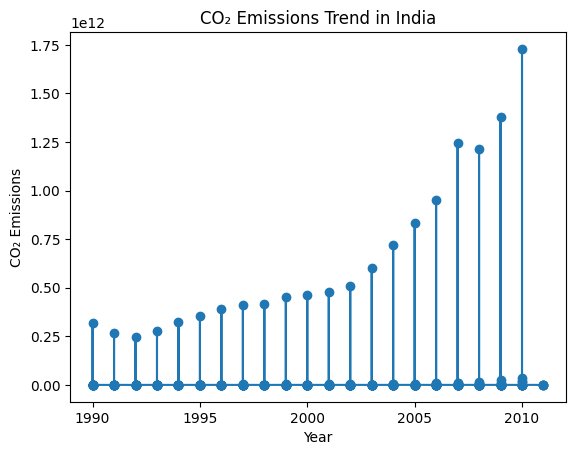

In [49]:
# CO₂ Emissions Trend for a Country (e.g., India)
india_data = data_cleaned[data_cleaned["Country name"] == "India"]
plt.plot(india_data["Year"], india_data["CO2_Emissions"], marker="o")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.title("CO₂ Emissions Trend in India")
plt.show()

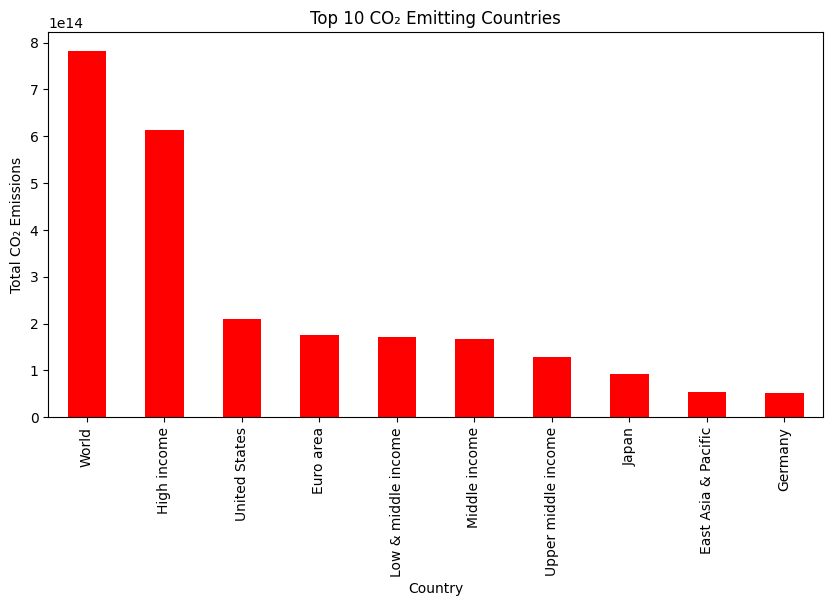

In [50]:
# Top 10 Polluting Countries (Bar Chart)
top_countries.plot(kind="bar", figsize=(10, 5), color="red")
plt.xlabel("Country")
plt.ylabel("Total CO₂ Emissions")
plt.title("Top 10 CO₂ Emitting Countries")
plt.show()

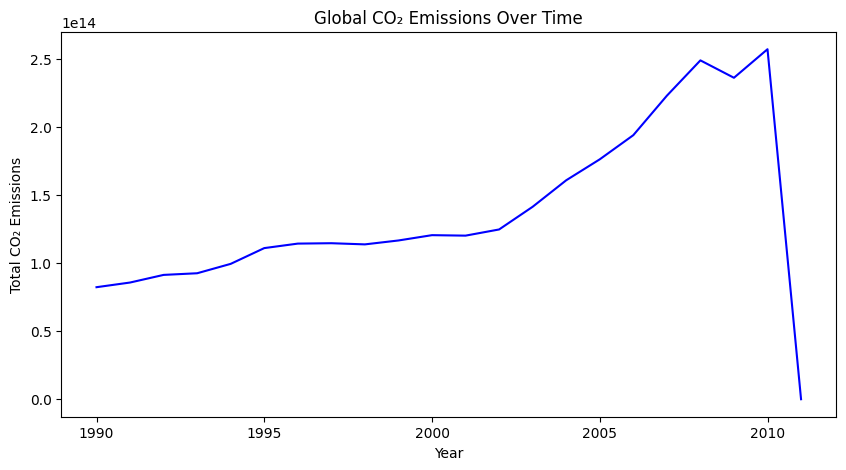

In [51]:
# CO₂ Emissions Over Time (Global Trend)
global_trend = data_cleaned.groupby("Year")["CO2_Emissions"].sum()
global_trend.plot(kind="line", title="Global CO₂ Emissions Over Time", figsize=(10,5), color="blue")
plt.ylabel("Total CO₂ Emissions")
plt.show()

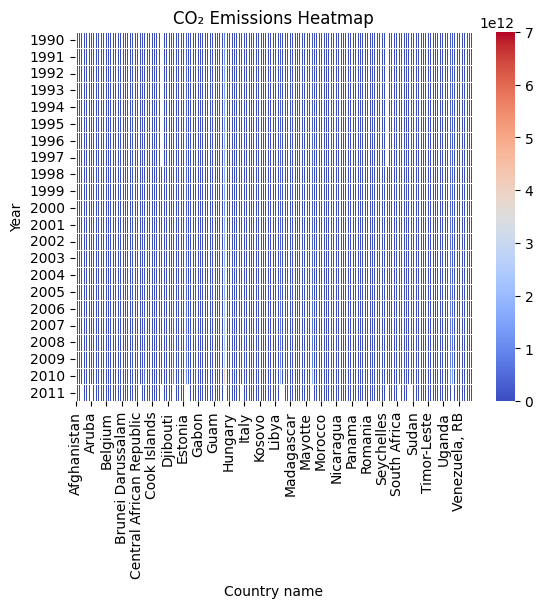

In [52]:
# Heatmap of CO₂ Emissions (Correlation Analysis)
pivot_data = data_cleaned.pivot_table(index="Year", columns="Country name", values="CO2_Emissions", aggfunc="mean")
sns.heatmap(pivot_data, cmap="coolwarm", linewidths=0.5)
plt.title("CO₂ Emissions Heatmap")
plt.show()

3. Predicting Future CO₂ Emissions (Machine Learning)

If you want to predict future emissions, you can use Linear Regression, ARIMA, or LSTM models.


In [53]:
# Selecting a specific country (e.g., India)
india_data = data_cleaned[data_cleaned["Country name"] == "India"]

In [54]:
# Prepare training data
X = india_data[["Year"]]
y = india_data["CO2_Emissions"]

In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict future emissions
future_years = pd.DataFrame({"Year": range(2012, 2030)})
future_predictions = model.predict(future_years)

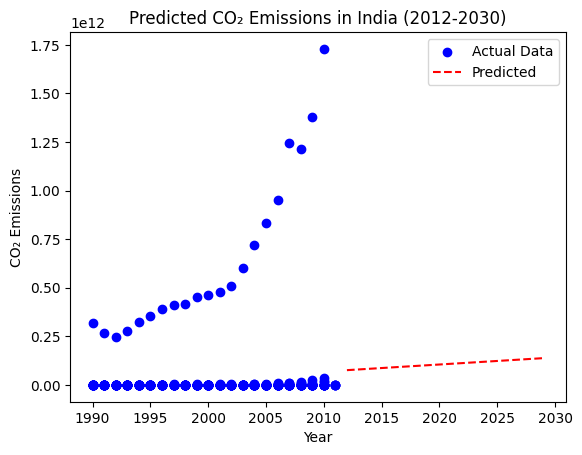

In [58]:
# Plot predictions
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(future_years, future_predictions, color="red", linestyle="dashed", label="Predicted")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.title("Predicted CO₂ Emissions in India (2012-2030)")
plt.legend()
plt.show()

4. CO₂ Emissions vs. Economic Growth

In [59]:
print(data_cleaned.columns)

Index(['Country code', 'Country name', 'Series code', 'Series name', 'SCALE',
       'Decimals', 'Year', 'CO2_Emissions'],
      dtype='object')


5. Geospatial Visualization (Heatmap)

In [60]:
# World Map of CO₂ Emissions
fig = px.choropleth(data_cleaned,
                    locations="Country name",
                    locationmode="country names",
                    color="CO2_Emissions",
                    animation_frame="Year",
                    title="CO₂ Emissions Over Time by Country")
fig.show()

6. Finding Anomalies & Insights

Identify Countries with Fastest Growing CO₂ Emissions

<ipython-input-61-fb4152c50d2d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



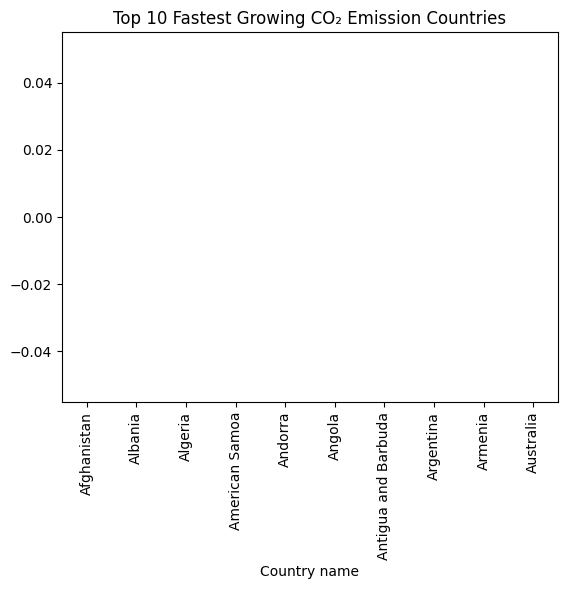

In [61]:
growth_rate = data_cleaned.groupby("Country name")["CO2_Emissions"].pct_change()
data_cleaned["Growth_Rate"] = growth_rate
top_growth = data_cleaned.groupby("Country name")["Growth_Rate"].mean().nlargest(10)
top_growth.plot(kind="bar", title="Top 10 Fastest Growing CO₂ Emission Countries")
plt.show()

7. Building a CO₂ Emissions Dashboard with Streamlit

In [62]:
df = pd.read_csv("/content/Co2Emission_Prediction/Data/cleaned_data.csv")

In [63]:
# Streamlit Page Setup
st.set_page_config(page_title="CO₂ Emissions Dashboard", layout="wide")

st.title("CO₂ Emissions Analysis Dashboard")

2025-03-11 16:59:53.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 16:59:53.753 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 16:59:53.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [65]:
print(df.columns)

Index(['country', 'year', 'cereal_yield', 'fdi_%GDP', 'energy_per_GDP',
       'energy_per_capt', 'co2_total', 'co2_per_capt', 'co2_per_unit',
       'popul_agglomeration', 'protected_areas', 'gdp', 'gni_capt',
       'under_5_mortality', 'popul_growth', 'Population', 'urb_popul_growth',
       'urb_popul'],
      dtype='object')


In [67]:
df.columns = df.columns.str.strip()

In [68]:
print(df.columns)  # Check if "Year" is present

Index(['country', 'year', 'cereal_yield', 'fdi_%GDP', 'energy_per_GDP',
       'energy_per_capt', 'co2_total', 'co2_per_capt', 'co2_per_unit',
       'popul_agglomeration', 'protected_areas', 'gdp', 'gni_capt',
       'under_5_mortality', 'popul_growth', 'Population', 'urb_popul_growth',
       'urb_popul'],
      dtype='object')


In [69]:
df.rename(columns={'year': 'Year'}, inplace=True)  # If "year" is lowercase

In [70]:
print(df.head())  # View sample data

                country  Year  cereal_yield  fdi_%GDP  energy_per_GDP  \
0                Angola  1991         417.4  5.449515      179.271884   
1  United Arab Emirates  1991        1594.0  0.076475      245.977706   
2             Argentina  1991        2666.1  1.285579      173.122857   
3             Australia  1991        1603.3  1.306912      208.686644   
4               Austria  1991        5463.0  0.209142      128.939160   

   energy_per_capt   co2_total  co2_per_capt  co2_per_unit  \
0       565.451027    4367.397      0.409949    129.971142   
1     12262.388130   57010.849     29.851550    598.807980   
2      1434.960601  117021.304      3.536073    426.614517   
3      4926.727783  281530.258     16.288490    689.948873   
4      3381.073790   65888.656      8.448456    322.186648   

   popul_agglomeration  protected_areas           gdp  gni_capt  \
0            15.290728        12.399822  1.219375e+10     820.0   
1            26.377204         0.266886  3.391964e+10 

In [72]:
df = pd.read_csv("/content/co2_emission_cleaned.csv", encoding="utf-8")

<ipython-input-72-9d14da2f1fd7>:1: DtypeWarning:

Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.



In [73]:
print(df["Year"])

0        1990
1        1990
2        1990
3        1990
4        1990
         ... 
86322    2011
86323    2011
86324    2011
86325    2011
86326    2011
Name: Year, Length: 86327, dtype: int64


In [74]:
# Sidebar Filters
year_selected = st.sidebar.selectbox("Select Year", df["Year"].unique())
country_selected = st.sidebar.selectbox("Select Country", df["Country name"].unique())

2025-03-11 17:04:45.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:45.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:45.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:45.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:45.275 Session state does not function when running a script without `streamlit run`
2025-03-11 17:04:45.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:45.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:45.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04

In [75]:
# Filter Data
df_filtered = df[(df["Year"] == year_selected)]

In [76]:
# Line Chart - Emissions Over Time
fig_line = px.line(df[df["Country name"] == country_selected],
                   x="Year", y="CO2_Emissions", title=f"CO₂ Emissions Trend: {country_selected}")

In [77]:
# Bar Chart - Top 10 CO₂ Emitting Countries
top_countries = df_filtered.nlargest(10, "CO2_Emissions")
fig_bar = px.bar(top_countries, x="Country name", y="CO2_Emissions", title="Top 10 CO₂ Emitting Countries")

In [78]:
# Scatter Plot - Emissions vs GDP (If GDP is available)
if "GDP" in df.columns:
    fig_scatter = px.scatter(df_filtered, x="GDP", y="CO2_Emissions", color="Country name",
                             title="CO₂ Emissions vs GDP")
    st.plotly_chart(fig_scatter)

In [79]:
# Display Charts
st.plotly_chart(fig_line)
st.plotly_chart(fig_bar)

2025-03-11 17:04:59.964 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:59.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:59.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:59.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:59.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:59.976 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:59.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 17:04:59.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()